In [1]:
import datamol as dm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# Load the MoleculeNet data
df = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv")
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [3]:
y_true = df["measured log solubility in mols per litre"].values
y_true.shape

(1128,)

In [4]:
# Simply predict log solubility based on LogP
predict_fn = dm.descriptors.any_rdkit_descriptor("MolLogP")

In [5]:
smiles = df["smiles"].values
mols = [dm.to_mol(smi) for smi in smiles]
y_pred = np.array([predict_fn(mol) for mol in mols])
y_pred.shape

(1128,)

## Evaluate

In [6]:
mask = y_true >= -6
mask &= y_true <= -3

r2_full = r2_score(y_true=y_true, y_pred=y_pred)
r2_masked = r2_score(y_true=y_true[mask], y_pred=y_pred[mask])
r2_full, r2_masked

(-9.127464611429879, -90.43648349718879)

## Visualize

Text(-11.5, -5.5, 'R2 (full range): -90.436')

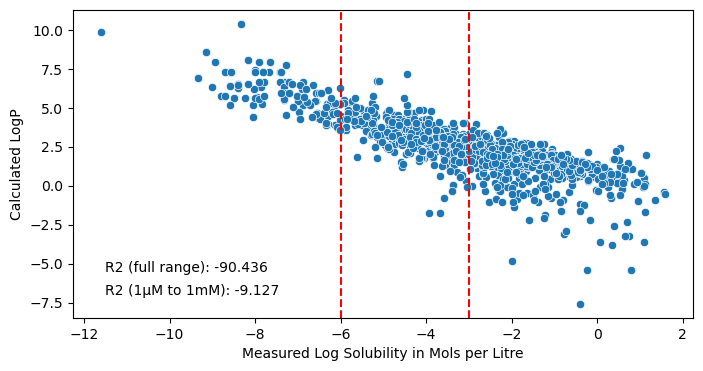

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))

# Fullscreen
ax = sns.scatterplot(x=y_true, y=y_pred, ax=ax)
ax.set_ylabel("Calculated LogP")
ax.set_xlabel("Measured Log Solubility in Mols per Litre")

ylim = ax.get_ylim()
ax.plot([-6, -6], ylim, "r--")
ax.plot([-3, -3], ylim, "r--")
ax.set_ylim(ylim)

ax.text(-11.5, -7, f"R2 (1µM to 1mM): {r2_full:.3f}", ha="left")
ax.text(-11.5, -5.5, f"R2 (full range): {r2_masked:.3f}", ha="left")

The End. 